In [9]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, 'x_train samples')
print(x_test.shape, 'x_test samples')
print(y_train.shape, 'y_trian samples')
print(y_test.shape, 'Y_test samples')

(50000, 32, 32, 3) x_train samples
(10000, 32, 32, 3) x_test samples
(50000, 1) y_trian samples
(10000, 1) Y_test samples


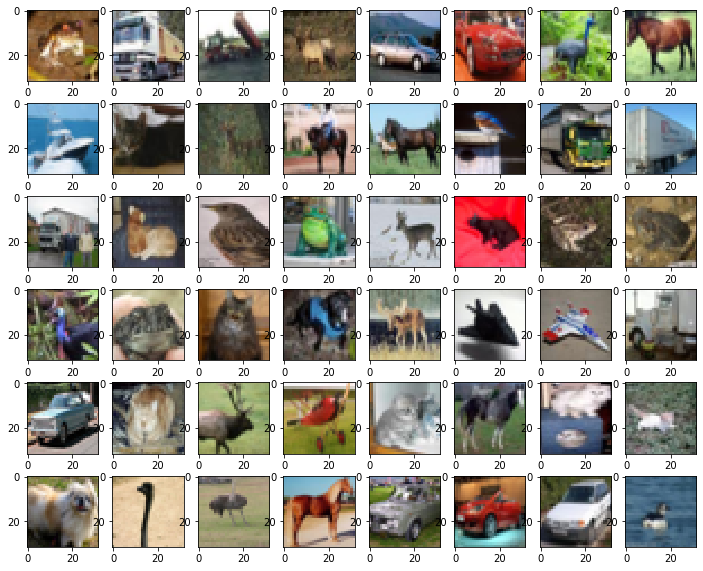

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
x, y = 8, 6

for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],interpolation='nearest')
plt.show()

In [11]:
import keras
# 将类向量转换为二进制类矩阵。
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D

# 构建CNN网络

model = Sequential()

# 添加卷积层
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
# 添加激活层
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 添加最大池化层
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 将上一层输出的数据变成一维
model.add(Flatten())
# 添加全连接层
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# 网络模型的介绍
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [13]:
from keras.optimizers import RMSprop
# 利用 RMSprop 来训练模型。
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=64,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/64
50000/50000 [==============================] - 26s 523us/step - loss: 2.2174 - accuracy: 0.2213 - val_loss: 1.6694 - val_accuracy: 0.4297
Epoch 2/64
50000/50000 [==============================] - 26s 519us/step - loss: 1.5134 - accuracy: 0.4670 - val_loss: 1.4086 - val_accuracy: 0.5164
Epoch 3/64
50000/50000 [==============================] - 26s 518us/step - loss: 1.4120 - accuracy: 0.5118 - val_loss: 1.3444 - val_accuracy: 0.5342
Epoch 4/64
50000/50000 [==============================] - 26s 521us/step - loss: 1.3718 - accuracy: 0.5299 - val_loss: 1.2457 - val_accuracy: 0.5661
Epoch 5/64
50000/50000 [==============================] - 26s 521us/step - loss: 1.3553 - accuracy: 0.5388 - val_loss: 1.2360 - val_accuracy: 0.5638
Epoch 6/64
50000/50000 [==============================] - 27s 532us/step - loss: 1.3627 - accuracy: 0.5360 - val_loss: 1.1566 - val_accuracy: 0.5962
Epoch 7/64
50000/50000 [==============================] 

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 61.86403895263672
Test accuracy: 0.10000000149011612


In [16]:
import matplotlib.pyplot as plt

# 绘制训练过程中训练集和测试集合的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练过程中训练集和测试集合的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined